# TP2

Para la imagen suministrada "metal grid". Implementar un algoritmo que:
1. Calcule los gradientes en la imagen (dirección y módulo)
2. Muestre imágenes de ángulo y módulo.
3. Marque con color las direcciones de gradientes más altos.

In [9]:
#%matplotlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import walk

(350, 735, 3)

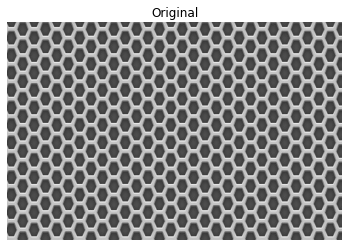

In [23]:
img = cv.imread("data/metalgrid.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(img,aspect='auto')
plt.title("Original")
plt.axis('off')

img.shape

In [22]:
def gradient(img):
    """Devuelve el gradiente de una imagen en dos arrays: magnitud y ángulo en grados.
    """
    # Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(img,cv.CV_32F,1,0,ksize=3)
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64/absx_64.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    # De igual modo para Sobely
    sobely_64 = cv.Sobel(img,cv.CV_32F,0,1,ksize=3)
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64/absy_64.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag/mag.max()*255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)
    return mag,angle

mag.shape
angle.shape

(350, 735, 3)

In [45]:
mag.max(),mag.min()
mag_max = mag
mag_max.shape

(350, 735, 3)

(-0.5, 734.5, 349.5, -0.5)

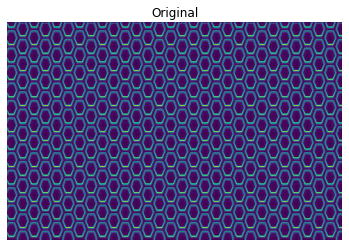

In [51]:
plt.imshow(mag_max[:,:,0],aspect='auto')
plt.title("Original")
plt.axis('off')